In [59]:
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pdr.get_data_tiingo('AAPL', api_key='fbdf50a3c54ab5e3579cd7e64fa828dac86926b5')

In [16]:
df.to_csv('Apple.csv')

In [60]:
df=pd.read_csv('Apple.csv')
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-06-22 00:00:00+00:00,127.61,128.06,127.0800,127.49,34039345,117.595601,118.010287,117.107194,117.485018,34039345,0.0,1.0
1,1,AAPL,2015-06-23 00:00:00+00:00,127.03,127.61,126.8792,127.48,30268863,117.061118,117.595601,116.922152,117.475803,30268863,0.0,1.0
2,2,AAPL,2015-06-24 00:00:00+00:00,128.11,129.80,127.1200,127.21,55280855,118.056363,119.613737,117.144055,117.226992,55280855,0.0,1.0
3,3,AAPL,2015-06-25 00:00:00+00:00,127.50,129.20,127.5000,128.86,31938100,117.494234,119.060823,117.494234,118.747505,31938100,0.0,1.0
4,4,AAPL,2015-06-26 00:00:00+00:00,126.75,127.99,126.5100,127.67,44066841,116.803091,117.945780,116.581926,117.650893,44066841,0.0,1.0


In [18]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,1254,AAPL,2020-06-15 00:00:00+00:00,342.99,345.68,332.58,333.250,34702230,342.99,345.68,332.58,333.250,34702230,0.0,1.0
1255,1255,AAPL,2020-06-16 00:00:00+00:00,352.08,353.20,344.72,351.460,41357182,352.08,353.20,344.72,351.460,41357182,0.0,1.0
1256,1256,AAPL,2020-06-17 00:00:00+00:00,351.59,355.40,351.09,355.150,28601626,351.59,355.40,351.09,355.150,28601626,0.0,1.0
1257,1257,AAPL,2020-06-18 00:00:00+00:00,351.73,353.45,349.22,351.410,24205096,351.73,353.45,349.22,351.410,24205096,0.0,1.0
1258,1258,AAPL,2020-06-19 00:00:00+00:00,349.72,356.56,345.15,354.635,66118952,349.72,356.56,345.15,354.635,66118952,0.0,1.0


In [61]:
df1=df.reset_index()['close']
df1

0       127.61
1       127.03
2       128.11
3       127.50
4       126.75
         ...  
1254    342.99
1255    352.08
1256    351.59
1257    351.73
1258    349.72
Name: close, Length: 1259, dtype: float64

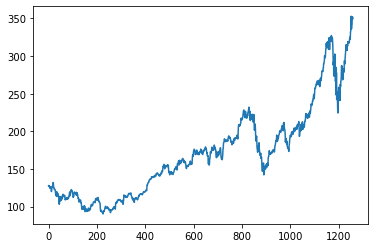

In [20]:
plt.plot(df1)

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1.shape)

(1259, 1)


In [64]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(818, 441)

In [68]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [69]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [70]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [71]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [72]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [73]:
X_train.shape

(717, 100, 1)

In [74]:
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import Sequential

In [80]:
mol=Sequential()
mol.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
mol.add(LSTM(50,return_sequences=True))
mol.add(LSTM(50))
mol.add(Dense(1))
mol.compile(optimizer='adam',loss='mean_squared_error')
mol.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [81]:
mol.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [86]:
mol.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Train on 717 samples, validate on 340 samples
Epoch 1/100
717/717 [==============================] - 4s 5ms/sample - loss: 9.7881e-05 - val_loss: 7.7067e-04
Epoch 2/100
717/717 [==============================] - 3s 5ms/sample - loss: 9.7137e-05 - val_loss: 6.9960e-04
Epoch 3/100
717/717 [==============================] - 4s 5ms/sample - loss: 9.3128e-05 - val_loss: 7.1131e-04
Epoch 4/100
717/717 [==============================] - 4s 5ms/sample - loss: 9.4293e-05 - val_loss: 6.4612e-04
Epoch 5/100
717/717 [==============================] - 4s 6ms/sample - loss: 9.5465e-05 - val_loss: 0.0011
Epoch 6/100
717/717 [==============================] - 4s 5ms/sample - loss: 9.8400e-05 - val_loss: 0.0010
Epoch 7/100
717/717 [==============================] - 3s 5ms/sample - loss: 1.0310e-04 - val_loss: 6.4680e-04
Epoch 8/100
717/717 [==============================] - 3s 5ms/sample - loss: 1.1525e-04 - val_loss: 0.0013
Epoch 9/100
717/717 [==============================] - 4s 6ms/sample - loss: 1

KeyboardInterrupt: 